<a href="https://colab.research.google.com/github/gathukalinet/classdataset/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 - Data Preprocessing
#### Linet. David. Newton.

In [304]:
# Importing necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [305]:
# Converting the CSV into a dataframe and displaying the first 5 rows.
df = pd.read_csv("https://raw.githubusercontent.com/gathukalinet/classdataset/refs/heads/main/ihm_48_hours.csv")
# df.shape
df.head()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
0,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,-11.396037,-19.976803,NaN,76.0,94.000000,17.0,116.0,36.388889,83.5,NaN,30552,0
1,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
2,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,-6.497052,18.0,116.0,36.388889,83.5,NaN,30552,0
3,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
4,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0


In [306]:
# Checking all the columns and their datatypes.
df.dtypes
# df.isna().sum()

,0
Capillary refill rate,float64
Diastolic blood pressure,float64
Fraction inspired oxygen,float64
Glascow coma scale eye opening,object
Glascow coma scale motor response,object
Glascow coma scale total,float64
Glascow coma scale verbal response,object
Glucose,float64
Heart Rate,float64
Height,float64


In [307]:
# Upon noticing that the target column has zeros, a .unique was carried out. This appears to be a categorical column though has
# int dtype
df['target'].unique()

array([0, 1])

## Categorical Variables

In [308]:
# Placing all the categorical datatypes into a separate dataframe.
categorical_df = df.select_dtypes(include=['object'])
categorical_df.columns

Index(['Glascow coma scale eye opening', 'Glascow coma scale motor response',
       'Glascow coma scale verbal response', 'Patient_id'],
      dtype='object')

In [309]:
#Finding the Unique Values of each categorical column.
unique_values_per_column = categorical_df.apply(lambda x: x.unique())
print(unique_values_per_column)

Glascow coma scale eye opening        [Spontaneously, 1 No Response, 4 Spontaneously...
Glascow coma scale motor response     [Obeys Commands, 4 Flex-withdraws, 5 Localizes...
Glascow coma scale verbal response    [Oriented, 1.0 ET/Trach, nan, No Response-ETT,...
Patient_id                            [30552, 6893_, 63456, 32335, 24478, 80511, 839...
dtype: object


In [310]:
# Checking the null count of the categorical features
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300912 entries, 0 to 300911
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Glascow coma scale eye opening      274190 non-null  object
 1   Glascow coma scale motor response   296978 non-null  object
 2   Glascow coma scale verbal response  296884 non-null  object
 3   Patient_id                          300912 non-null  object
dtypes: object(4)
memory usage: 9.2+ MB


In [311]:
#Removing the null values in the categorical dataframe.
categorical_df= categorical_df.dropna(subset=categorical_df.columns)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267046 entries, 0 to 300911
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Glascow coma scale eye opening      267046 non-null  object
 1   Glascow coma scale motor response   267046 non-null  object
 2   Glascow coma scale verbal response  267046 non-null  object
 3   Patient_id                          267046 non-null  object
dtypes: object(4)
memory usage: 10.2+ MB


### Insights.

- There are not many null values in the categorical dtype features.

- There are no binary categorical dtypes since every feature has more than 2 unique variables.

- There is however, a binary datatype among the numericals. The column 'target' has 0s and 1s only.

- While Patient Id is a numerical value, it is considered categorical since any statistical analysis performed on this feature would be pointless.

## Numerical Variables

In [312]:
# Placing all the numerical columns into another dataframe.

numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.columns

Index(['Capillary refill rate', 'Diastolic blood pressure',
       'Fraction inspired oxygen', 'Glascow coma scale total', 'Glucose',
       'Heart Rate', 'Height', 'Mean blood pressure', 'Oxygen saturation',
       'Respiratory rate', 'Systolic blood pressure', 'Temperature', 'Weight',
       'pH', 'target'],
      dtype='object')

In [313]:
numerical_df.isna().sum()

,0
Capillary refill rate,294576
Diastolic blood pressure,3968
Fraction inspired oxygen,212448
Glascow coma scale total,116496
Glucose,214
Heart Rate,0
Height,245088
Mean blood pressure,3928
Oxygen saturation,0
Respiratory rate,48


In [314]:
#Statistical description of the numerical variables.

numerical_df.describe()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,6336.000000,296944.000000,88464.000000,184416.000000,300698.000000,300912.000000,55824.000000,296984.00000,300912.000000,300864.000000,300912.000000,298848.000000,221040.000000,230614.000000,300912.000000
mean,0.219223,62.541099,0.599884,10.818123,130.628329,79.447793,168.543422,78.79108,95.343460,18.731265,119.694213,36.832834,82.969018,5.573617,0.142128
std,0.413753,341.559624,0.253919,4.334923,84.171126,32.145920,15.137414,29.52986,2529.203751,6.884248,23.396042,1.000075,26.765857,5.963634,0.349182
min,0.000000,0.000000,0.000000,3.000000,-19.999974,-19.999623,0.000000,-34.00000,-19.999687,0.000000,0.000000,0.000000,0.000000,-19.999706,0.000000
25%,0.000000,51.000000,0.400000,8.000000,101.000000,70.000000,160.000000,68.00000,95.000000,15.000000,103.000000,36.277802,66.600000,7.310000,0.000000
50%,0.000000,59.000000,0.500000,11.000000,126.000000,84.000000,170.000000,77.00000,98.000000,18.000000,117.000000,36.833333,79.099998,7.370000,0.000000
75%,0.000000,69.000000,0.700000,15.000000,158.000000,97.000000,178.000000,88.00000,100.000000,22.000000,134.000000,37.388889,94.699997,7.420000,0.000000
max,1.000000,100105.010000,7.100000,15.000000,9999.000000,941.000000,203.000000,9381.00000,981023.000000,1211.000000,295.000000,73.760002,931.224376,99.000000,1.000000


In [315]:
# Dropping columns with lots of null values and checking the new summary statistics.
numerical_df = numerical_df.drop(['Capillary refill rate','Fraction inspired oxygen','Height'], axis=1)
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,296944.000000,184416.000000,300698.000000,300912.000000,296984.00000,300912.000000,300864.000000,300912.000000,298848.000000,221040.000000,230614.000000,300912.000000
mean,62.541099,10.818123,130.628329,79.447793,78.79108,95.343460,18.731265,119.694213,36.832834,82.969018,5.573617,0.142128
std,341.559624,4.334923,84.171126,32.145920,29.52986,2529.203751,6.884248,23.396042,1.000075,26.765857,5.963634,0.349182
min,0.000000,3.000000,-19.999974,-19.999623,-34.00000,-19.999687,0.000000,0.000000,0.000000,0.000000,-19.999706,0.000000
25%,51.000000,8.000000,101.000000,70.000000,68.00000,95.000000,15.000000,103.000000,36.277802,66.600000,7.310000,0.000000
50%,59.000000,11.000000,126.000000,84.000000,77.00000,98.000000,18.000000,117.000000,36.833333,79.099998,7.370000,0.000000
75%,69.000000,15.000000,158.000000,97.000000,88.00000,100.000000,22.000000,134.000000,37.388889,94.699997,7.420000,0.000000
max,100105.010000,15.000000,9999.000000,941.000000,9381.00000,981023.000000,1211.000000,295.000000,73.760002,931.224376,99.000000,1.000000


In [316]:
print(df.loc[(df.pH == 99)])

        Capillary refill rate  Diastolic blood pressure  \
234432                    NaN                      53.0   
234433                    NaN                      56.0   
234434                    NaN                      56.0   
234435                    NaN                      65.0   
234436                    NaN                      61.0   
234437                    NaN                       NaN   
234438                    NaN                      57.0   
234439                    NaN                      57.0   
234440                    NaN                      56.0   
234441                    NaN                      56.0   

        Fraction inspired oxygen Glascow coma scale eye opening  \
234432                       NaN                4 Spontaneously   
234433                       NaN                4 Spontaneously   
234434                       NaN                4 Spontaneously   
234435                       NaN                4 Spontaneously   
234436         

In [317]:
# Dropping the entries with illogical pH values.
numerical_df = numerical_df[(numerical_df['pH'] <= 14) & (numerical_df['pH'] >= 6)]
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,203392.000000,131626.000000,206066.000000,206105.000000,203438.000000,206105.000000,206062.000000,206105.000000,204224.000000,153112.000000,206105.000000,206105.000000
mean,62.884411,9.826987,132.168289,80.212590,78.892934,98.385088,18.540504,119.049766,36.870314,84.171479,7.377486,0.159967
std,411.667227,4.356090,69.814209,32.026598,33.872253,3055.833527,7.313055,23.334632,1.037465,26.265796,0.078409,0.366576
min,0.000000,3.000000,-19.999579,-19.999623,-34.000000,-19.999687,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,7.000000,103.000000,71.000000,68.000000,95.000000,14.000000,103.000000,36.299999,67.539849,7.330000,0.000000
50%,59.000000,10.000000,128.000000,85.000000,77.000000,98.000000,18.000000,116.000000,36.888901,80.400002,7.380000,0.000000
75%,69.000000,15.000000,160.000000,98.000000,88.000000,100.000000,22.000000,133.000000,37.444445,95.800003,7.430000,0.000000
max,100105.010000,15.000000,1279.000000,222.000000,9381.000000,981023.000000,1211.000000,295.000000,73.760002,931.224376,7.690000,1.000000


In [318]:
# Oxygen saturation is a rate percentage of 0-100, dropping entries that show otherwise.
numerical_df = numerical_df[(numerical_df['Oxygen saturation'] <= 100) & (numerical_df['Oxygen saturation'] >= 0)]
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,187061.000000,120937.000000,189553.000000,189591.000000,187149.000000,189591.000000,189552.000000,189591.000000,187845.000000,140892.000000,189591.000000,189591.000000
mean,63.001502,9.828903,132.147886,80.200646,78.834007,97.471306,18.538255,119.022533,36.870087,84.172252,7.377472,0.159691
std,428.596383,4.355270,69.898701,32.012467,27.550561,3.913913,7.372501,23.320748,1.032134,26.286177,0.078398,0.366320
min,0.000000,3.000000,-19.997065,-19.999623,-34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,7.000000,103.000000,71.000000,68.000000,96.000000,14.000000,103.000000,36.299999,67.500000,7.330000,0.000000
50%,59.000000,10.000000,128.000000,85.000000,77.000000,98.000000,18.000000,116.000000,36.888901,80.400000,7.380000,0.000000
75%,69.000000,15.000000,160.000000,98.000000,88.000000,100.000000,22.000000,133.000000,37.444445,95.889349,7.430000,0.000000
max,100105.010000,15.000000,1279.000000,222.000000,9381.000000,100.000000,1211.000000,295.000000,73.760002,931.224376,7.690000,1.000000


In [319]:
# Heart rate percentage also ranges from 0(dead) to <= 250 for hypertensive illness.
numerical_df = numerical_df[(numerical_df['Heart Rate'] <= 300) & (numerical_df['Heart Rate'] >= 0)]
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,172171.000000,111371.000000,174448.000000,174483.000000,172218.000000,174483.000000,174449.000000,174483.000000,172875.000000,129681.000000,174483.000000,174483.000000
mean,62.626070,9.835343,132.103763,88.011159,78.833248,97.469063,18.543605,119.016472,36.868807,84.192989,7.377426,0.160027
std,376.074331,4.355359,69.980784,18.576336,28.243528,3.910940,7.433474,23.310652,1.035539,26.399429,0.078434,0.366632
min,0.000000,3.000000,-19.997065,0.000000,-34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,7.000000,103.000000,75.000000,68.000000,96.000000,14.000000,103.000000,36.299999,67.539849,7.330000,0.000000
50%,59.000000,10.000000,128.000000,87.000000,77.000000,98.000000,18.000000,116.000000,36.888901,80.400000,7.380000,0.000000
75%,69.000000,15.000000,160.000000,99.000000,88.000000,100.000000,22.000000,133.000000,37.444445,95.889349,7.430000,0.000000
max,100105.010000,15.000000,1279.000000,222.000000,9381.000000,100.000000,1211.000000,295.000000,73.760002,931.224376,7.690000,1.000000


In [320]:
# Mean blood pressure also ranges from 0(dead) to <= 300.
numerical_df = numerical_df[(numerical_df['Mean blood pressure'] <= 300) & (numerical_df['Mean blood pressure'] >= 0)]
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,169824.000000,109895.000000,172073.000000,172108.000000,172108.000000,172108.000000,172074.000000,172108.000000,170532.000000,127912.000000,172108.000000,172108.000000
mean,62.655832,9.835498,132.101040,88.000854,78.763546,97.469969,18.542733,119.023799,36.868265,84.178020,7.377450,0.160062
std,378.660307,4.356011,69.925772,18.576838,16.697771,3.899628,7.445395,23.307673,1.037095,26.301254,0.078419,0.366665
min,0.000000,3.000000,-19.997065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,7.000000,103.000000,75.000000,68.000000,96.000000,14.000000,103.000000,36.299999,67.539849,7.330000,0.000000
50%,59.000000,10.000000,128.000000,87.000000,77.000000,98.000000,18.000000,116.000000,36.888901,80.400000,7.380000,0.000000
75%,69.000000,15.000000,160.000000,99.000000,88.000000,100.000000,22.000000,133.000000,37.444445,95.800003,7.430000,0.000000
max,100105.010000,15.000000,1279.000000,222.000000,300.000000,100.000000,1211.000000,295.000000,73.760002,931.224376,7.690000,1.000000


In [321]:
numerical_df = numerical_df[(numerical_df['Diastolic blood pressure'] <= 200) & (numerical_df['Diastolic blood pressure'] >= 0)]
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,169802.000000,108416.000000,169768.000000,169802.000000,169802.000000,169802.000000,169769.000000,169802.000000,168249.000000,126223.000000,169802.000000,169802.000000
mean,60.583456,9.831648,132.091080,88.005836,78.753697,97.470144,18.545602,119.009429,36.868617,84.176978,7.377432,0.160063
std,14.367683,4.356215,69.921932,18.578897,16.694032,3.895449,7.458248,23.300815,1.038894,26.313875,0.078434,0.366665
min,0.000000,3.000000,-19.997065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,7.000000,103.000000,75.000000,68.000000,96.000000,14.000000,103.000000,36.299999,67.539849,7.330000,0.000000
50%,59.000000,10.000000,128.000000,87.000000,77.000000,98.000000,18.000000,116.000000,36.888901,80.400000,7.380000,0.000000
75%,69.000000,15.000000,160.000000,99.000000,88.000000,100.000000,22.000000,133.000000,37.444445,95.800003,7.430000,0.000000
max,194.000000,15.000000,1268.000000,222.000000,300.000000,100.000000,1211.000000,295.000000,73.760002,931.224376,7.690000,1.000000


In [322]:
numerical_df = numerical_df[(numerical_df['Glucose'] >= 0)]
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,156124.000000,99858.000000,156124.000000,156124.000000,156124.000000,156124.000000,156093.000000,156124.000000,154696.000000,116055.000000,156124.000000,156124.000000
mean,60.568747,9.830449,144.507580,88.013182,78.746688,97.470091,18.542602,118.992820,36.867917,84.182412,7.377504,0.159982
std,14.359125,4.355276,58.267896,18.570403,16.734029,3.898400,7.525452,23.297984,1.042205,26.368361,0.078413,0.366590
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,7.000000,109.000000,75.000000,68.000000,96.000000,14.000000,103.000000,36.299999,67.539849,7.330000,0.000000
50%,59.000000,10.000000,132.000000,87.000000,77.000000,98.000000,18.000000,116.000000,36.888901,80.400000,7.380000,0.000000
75%,69.000000,15.000000,164.000000,99.000000,88.000000,100.000000,22.000000,133.000000,37.444445,95.800003,7.430000,0.000000
max,194.000000,15.000000,1268.000000,222.000000,300.000000,100.000000,1211.000000,295.000000,73.760002,931.224376,7.690000,1.000000


In [323]:
# Rechecking the respiratory rate column to limit it to 100 (deadly)
numerical_df = numerical_df[(numerical_df['Respiratory rate'] <= 100)]
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,156086.000000,99827.000000,156086.000000,156086.000000,156086.000000,156086.000000,156086.000000,156086.000000,154659.000000,116017.000000,156086.000000,156086.000000
mean,60.569154,9.828984,144.512823,88.015837,78.743291,97.470314,18.523431,118.982990,36.867903,84.176420,7.377488,0.159822
std,14.358554,4.355150,58.273478,18.571176,16.733286,3.898448,6.557765,23.289247,1.042309,26.368785,0.078415,0.366442
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,7.000000,109.000000,75.000000,68.000000,96.000000,14.000000,103.000000,36.299999,67.539849,7.330000,0.000000
50%,59.000000,10.000000,132.000000,87.000000,77.000000,98.000000,18.000000,116.000000,36.888901,80.400000,7.380000,0.000000
75%,69.000000,15.000000,164.000000,99.000000,88.000000,100.000000,22.000000,133.000000,37.444445,95.800003,7.430000,0.000000
max,194.000000,15.000000,1268.000000,222.000000,300.000000,100.000000,99.000000,295.000000,73.760002,931.224376,7.690000,1.000000


In [324]:
# Rechecking the respiratory rate column to limit it to 100 (deadly)
numerical_df = numerical_df[(numerical_df['Temperature'] <= 50)]
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,154652.000000,99826.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,114584.000000,154652.000000,154652.000000
mean,60.593494,9.828932,144.437598,88.069705,78.772200,97.462247,18.542859,119.048354,36.866767,84.141354,7.377704,0.159972
std,14.371465,4.355141,58.258110,18.616646,16.741849,3.903668,6.562998,23.304319,1.028054,25.331154,0.078379,0.366581
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,7.000000,109.000000,75.000000,68.000000,96.000000,14.000000,103.000000,36.299999,67.539849,7.330000,0.000000
50%,59.000000,10.000000,132.000000,87.000000,77.000000,98.000000,18.000000,116.000000,36.888901,80.400002,7.380000,0.000000
75%,69.000000,15.000000,164.000000,99.000000,88.000000,100.000000,22.000000,133.000000,37.444445,95.889349,7.430000,0.000000
max,194.000000,15.000000,1268.000000,222.000000,300.000000,100.000000,99.000000,295.000000,42.222222,290.298880,7.690000,1.000000


In [325]:
# Replacing the nulls with their means.
for x in numerical_df.columns:
  numerical_df.fillna(numerical_df[x].mean(),inplace=True)

<ipython-input-325-704615d571d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.fillna(numerical_df[x].mean(),inplace=True)


Outliers in Diastolic blood pressure:
48         99.0
53        114.0
55        113.0
56        113.0
57        121.0
          ...  
299172    102.0
299173     99.0
299964    111.0
300844    107.0
300858     97.0
Name: Diastolic blood pressure, Length: 3094, dtype: float64


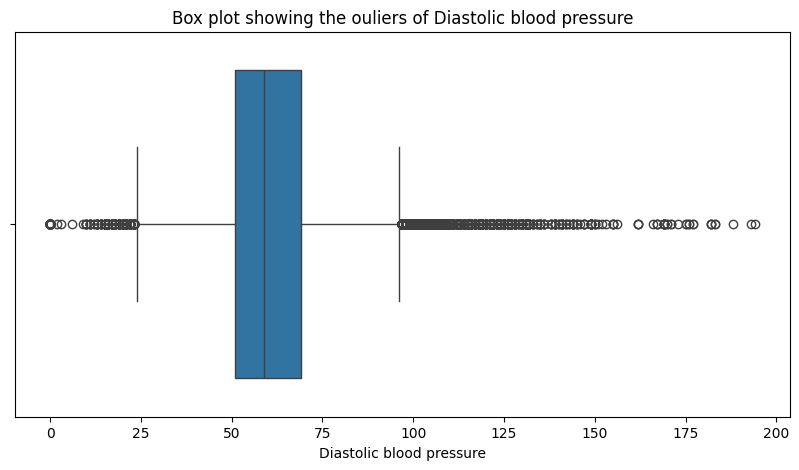

Outliers in Glascow coma scale total:
Series([], Name: Glascow coma scale total, dtype: float64)


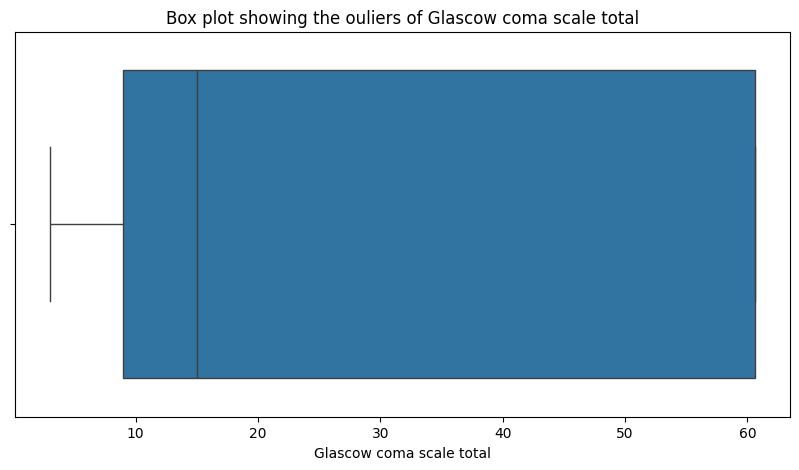

Outliers in Glucose:
474       287.0
475       287.0
476       287.0
479       287.0
817       364.0
          ...  
300806    410.0
300807    410.0
300808    410.0
300809    410.0
300812    283.0
Name: Glucose, Length: 8135, dtype: float64


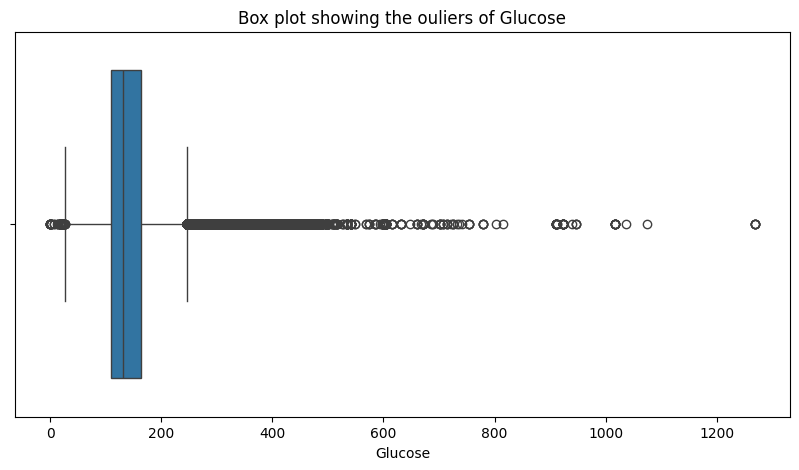

Outliers in Heart Rate:
903       137.0
1056      143.0
1805      161.0
1817      138.0
1818      138.0
          ...  
300142     36.0
300143     29.0
300872    140.0
300873    140.0
300874    136.0
Name: Heart Rate, Length: 2130, dtype: float64


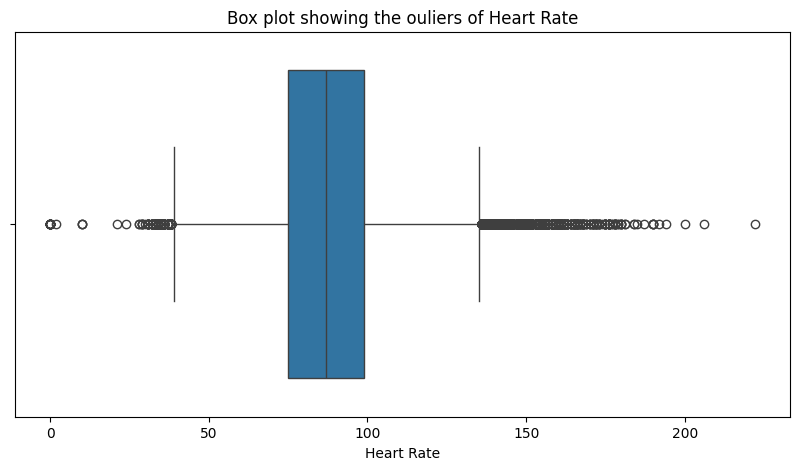

Outliers in Mean blood pressure:
53        144.0
55        138.0
56        138.0
57        141.0
58        135.0
          ...  
300557    125.0
300558    125.0
300562    119.0
300626    226.0
300640     32.0
Name: Mean blood pressure, Length: 3064, dtype: float64


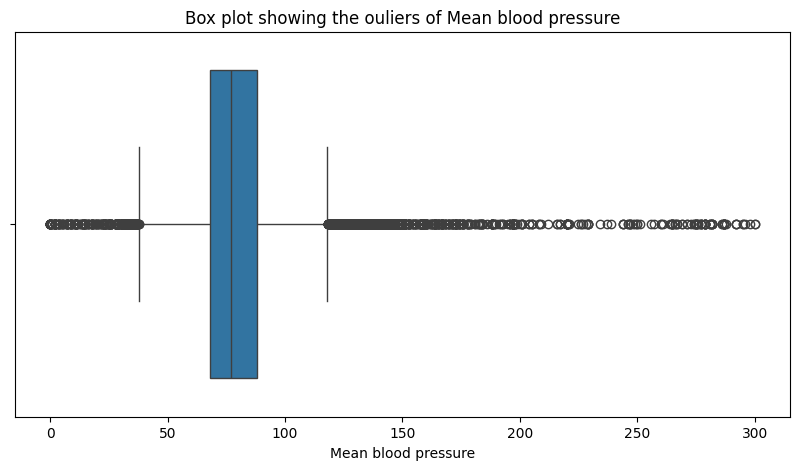

Outliers in Oxygen saturation:
462       89.0
464       87.0
466       89.0
481       86.0
482       86.0
          ... 
300260    89.0
300261    89.0
300262    89.0
300263    89.0
300264    83.0
Name: Oxygen saturation, Length: 3415, dtype: float64


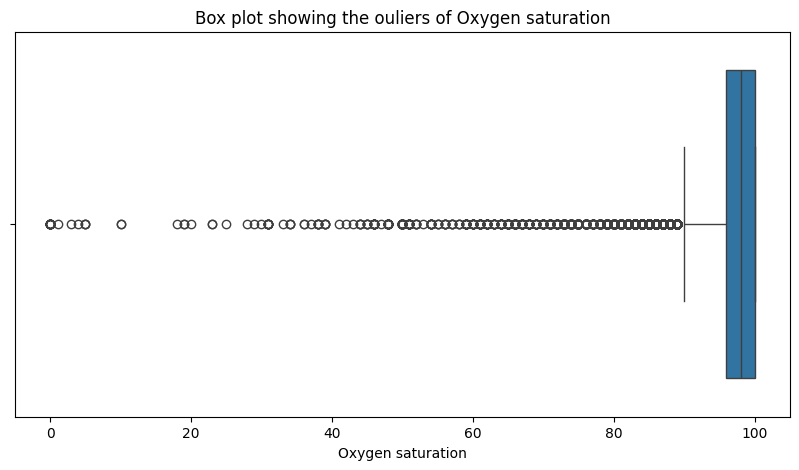

Outliers in Respiratory rate:
98         0.0
99         0.0
100        0.0
101        0.0
112        0.0
          ... 
300777    35.0
300823    35.0
300870    36.0
300900    46.0
300903    37.0
Name: Respiratory rate, Length: 4026, dtype: float64


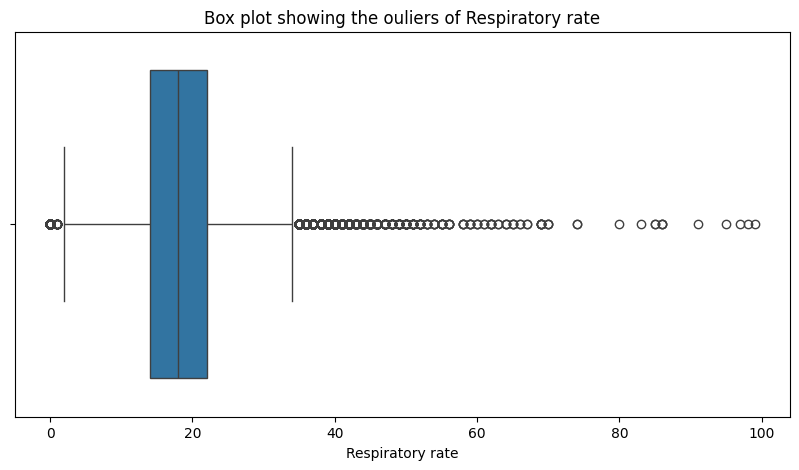

Outliers in Systolic blood pressure:
53        205.0
55        190.0
56        190.0
57        184.0
58        193.0
          ...  
300557    191.0
300558    191.0
300562    191.0
300773    198.0
300774    193.0
Name: Systolic blood pressure, Length: 2372, dtype: float64


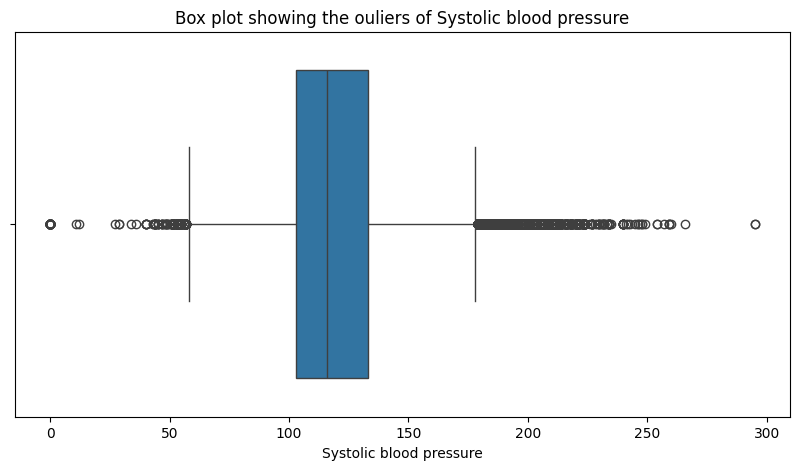

Outliers in Temperature:
336       32.900000
337       32.900000
342       32.900000
345       32.900000
346       32.900000
            ...    
300898    39.444444
300899    39.444444
300900    39.722222
300902    39.222221
300903    39.222221
Name: Temperature, Length: 3321, dtype: float64


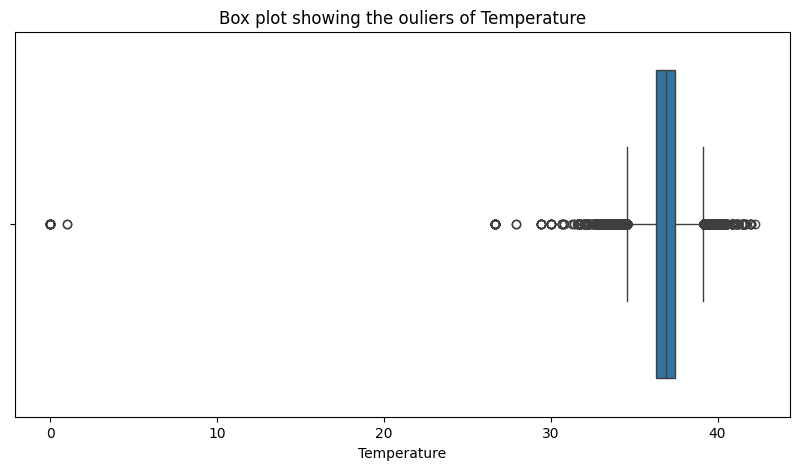

Outliers in Weight:
346         0.997902
347         0.997902
348         0.997902
349         0.997902
350         0.997902
             ...    
299895    134.500000
299896    134.500000
299898    134.500000
299899    134.500000
299900    134.500000
Name: Weight, Length: 4154, dtype: float64


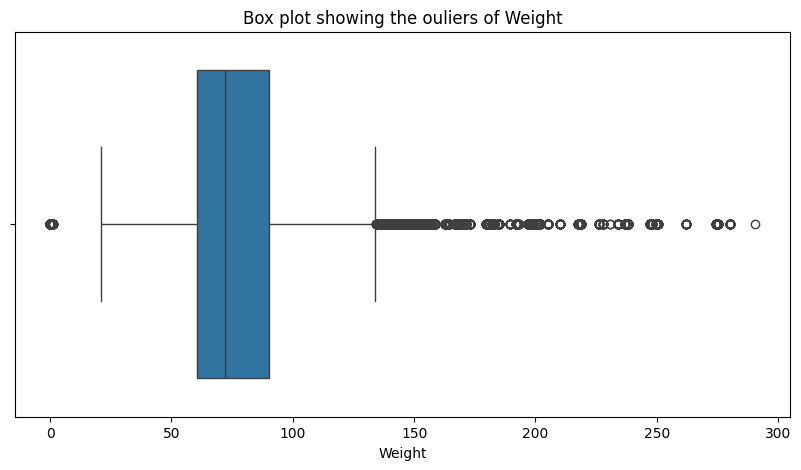

Outliers in pH:
336       7.02
337       7.02
342       7.02
345       7.02
346       7.02
          ... 
298418    7.17
298422    7.17
298423    7.17
299280    7.59
299283    7.58
Name: pH, Length: 3205, dtype: float64


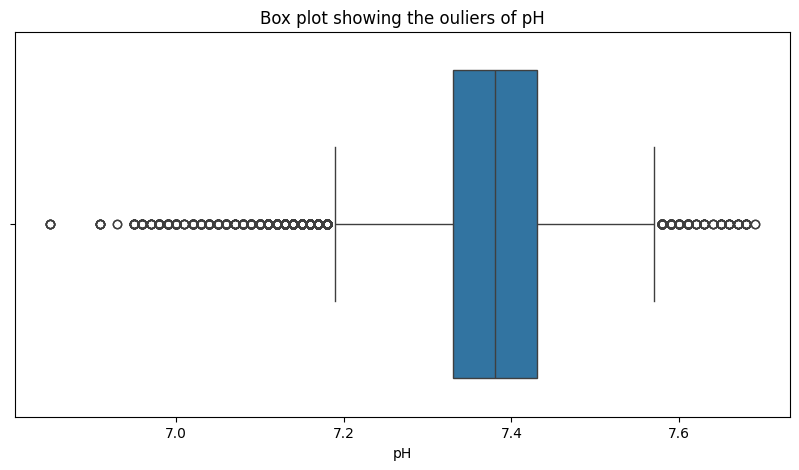

In [326]:
# Identifying outliers using plots.

def identify_outliers(col):

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return col[(col < lower_bound) | (col > upper_bound)]


for col in numerical_df:
  # Removing the columns whose box values are numerical but describe categorical data.
    if col  not in ['target']:

        outliers = identify_outliers(numerical_df[col])
        print(f"Outliers in {col}:")
        print(outliers)

        plt.figure(figsize=(10, 5))
        sns.boxplot(x=numerical_df[col])
        plt.title(f'Box plot showing the ouliers of {col}')
        plt.show()


In [327]:
# Checking the null values in the numerical columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300912 entries, 0 to 300911
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Capillary refill rate               6336 non-null    float64
 1   Diastolic blood pressure            296944 non-null  float64
 2   Fraction inspired oxygen            88464 non-null   float64
 3   Glascow coma scale eye opening      274190 non-null  object 
 4   Glascow coma scale motor response   296978 non-null  object 
 5   Glascow coma scale total            184416 non-null  float64
 6   Glascow coma scale verbal response  296884 non-null  object 
 7   Glucose                             300698 non-null  float64
 8   Heart Rate                          300912 non-null  float64
 9   Height                              55824 non-null   float64
 10  Mean blood pressure                 296984 non-null  float64
 11  Oxygen saturation         

Outliers in Diastolic blood pressure:
48         99.0
53        114.0
55        113.0
56        113.0
57        121.0
          ...  
299172    102.0
299173     99.0
299964    111.0
300844    107.0
300858     97.0
Name: Diastolic blood pressure, Length: 3094, dtype: float64


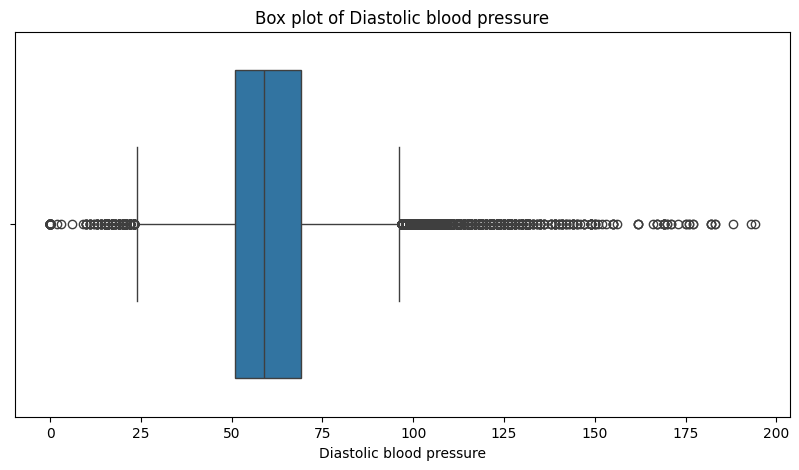

Outliers in Glascow coma scale total:
Series([], Name: Glascow coma scale total, dtype: float64)


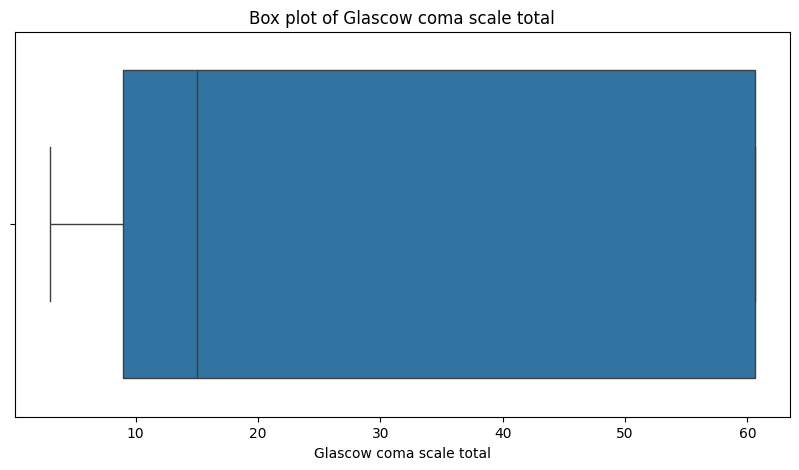

Outliers in Glucose:
474       287.0
475       287.0
476       287.0
479       287.0
817       364.0
          ...  
300806    410.0
300807    410.0
300808    410.0
300809    410.0
300812    283.0
Name: Glucose, Length: 8135, dtype: float64


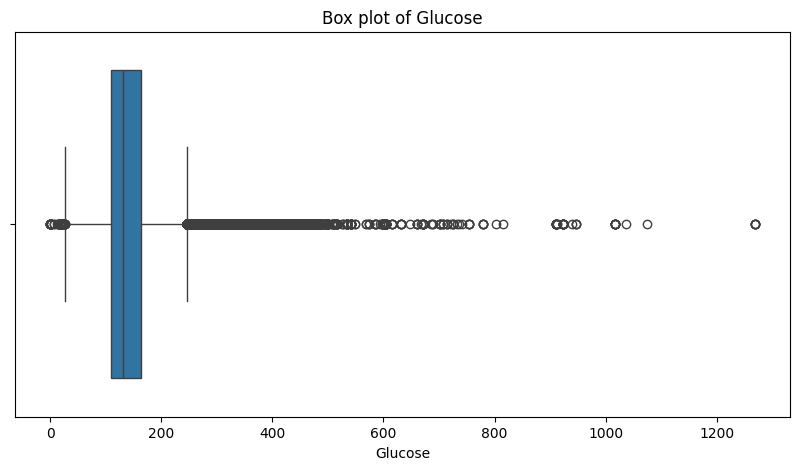

Outliers in Heart Rate:
903       137.0
1056      143.0
1805      161.0
1817      138.0
1818      138.0
          ...  
300142     36.0
300143     29.0
300872    140.0
300873    140.0
300874    136.0
Name: Heart Rate, Length: 2130, dtype: float64


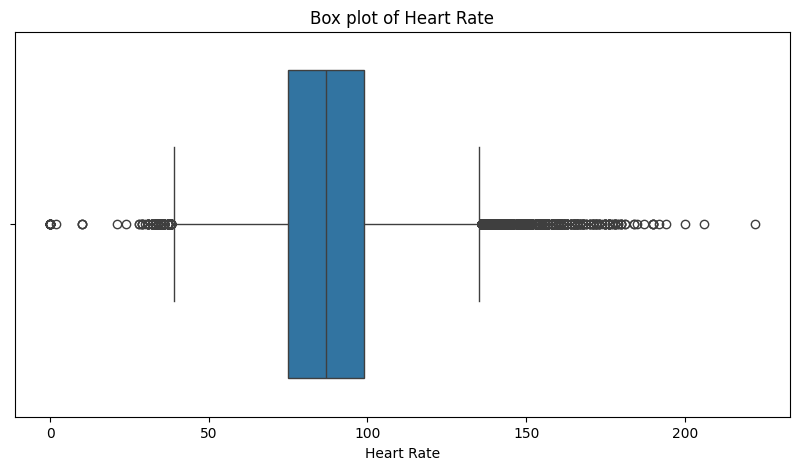

Outliers in Mean blood pressure:
53        144.0
55        138.0
56        138.0
57        141.0
58        135.0
          ...  
300557    125.0
300558    125.0
300562    119.0
300626    226.0
300640     32.0
Name: Mean blood pressure, Length: 3064, dtype: float64


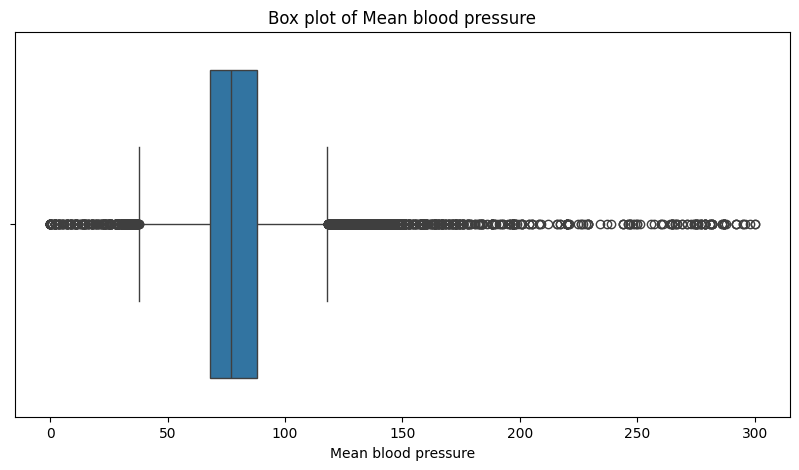

Outliers in Oxygen saturation:
462       89.0
464       87.0
466       89.0
481       86.0
482       86.0
          ... 
300260    89.0
300261    89.0
300262    89.0
300263    89.0
300264    83.0
Name: Oxygen saturation, Length: 3415, dtype: float64


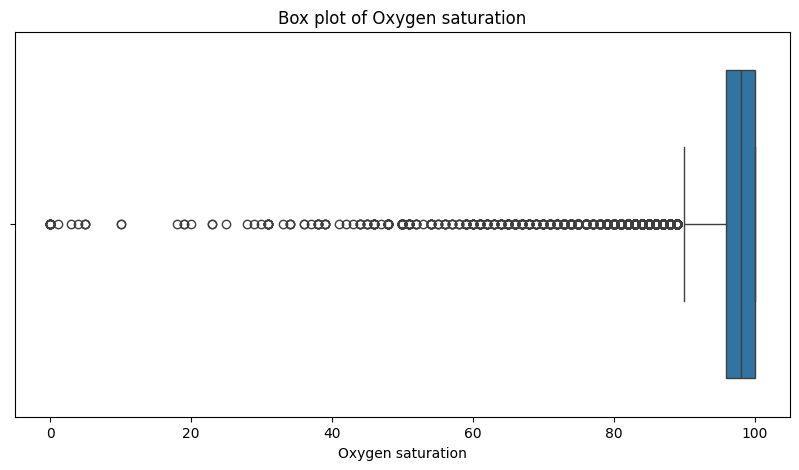

Outliers in Respiratory rate:
98         0.0
99         0.0
100        0.0
101        0.0
112        0.0
          ... 
300777    35.0
300823    35.0
300870    36.0
300900    46.0
300903    37.0
Name: Respiratory rate, Length: 4026, dtype: float64


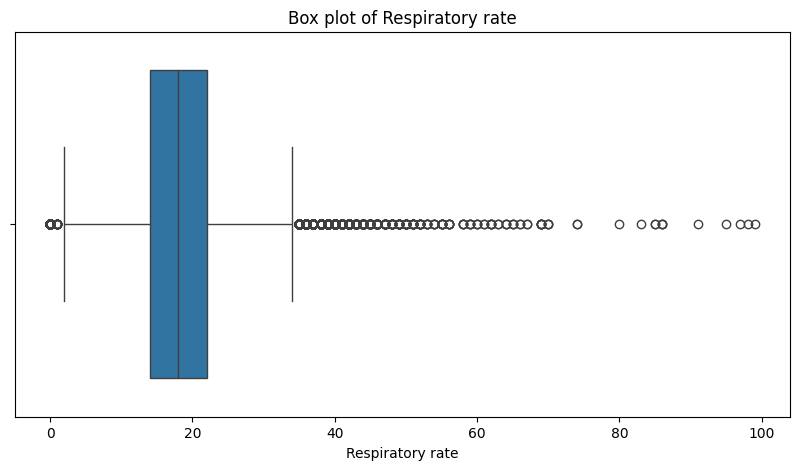

Outliers in Systolic blood pressure:
53        205.0
55        190.0
56        190.0
57        184.0
58        193.0
          ...  
300557    191.0
300558    191.0
300562    191.0
300773    198.0
300774    193.0
Name: Systolic blood pressure, Length: 2372, dtype: float64


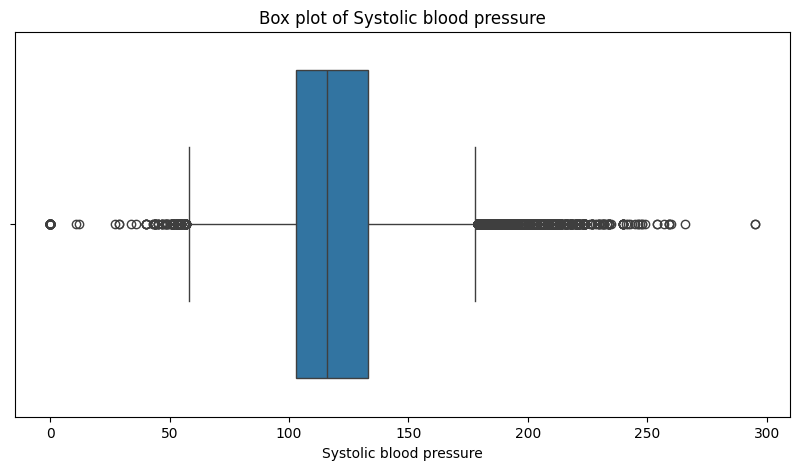

Outliers in Temperature:
336       32.900000
337       32.900000
342       32.900000
345       32.900000
346       32.900000
            ...    
300898    39.444444
300899    39.444444
300900    39.722222
300902    39.222221
300903    39.222221
Name: Temperature, Length: 3321, dtype: float64


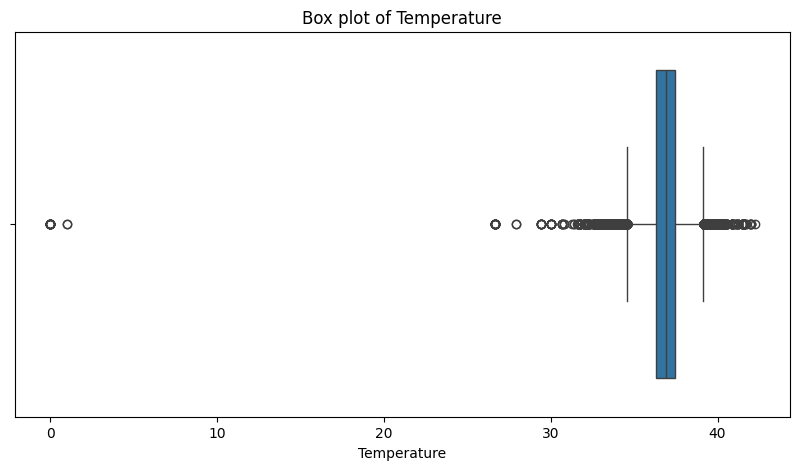

Outliers in Weight:
346         0.997902
347         0.997902
348         0.997902
349         0.997902
350         0.997902
             ...    
299895    134.500000
299896    134.500000
299898    134.500000
299899    134.500000
299900    134.500000
Name: Weight, Length: 4154, dtype: float64


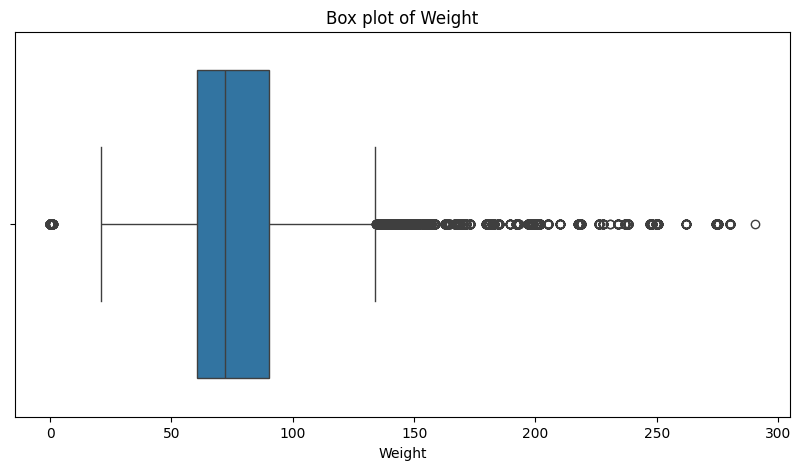

Outliers in pH:
336       7.02
337       7.02
342       7.02
345       7.02
346       7.02
          ... 
298418    7.17
298422    7.17
298423    7.17
299280    7.59
299283    7.58
Name: pH, Length: 3205, dtype: float64


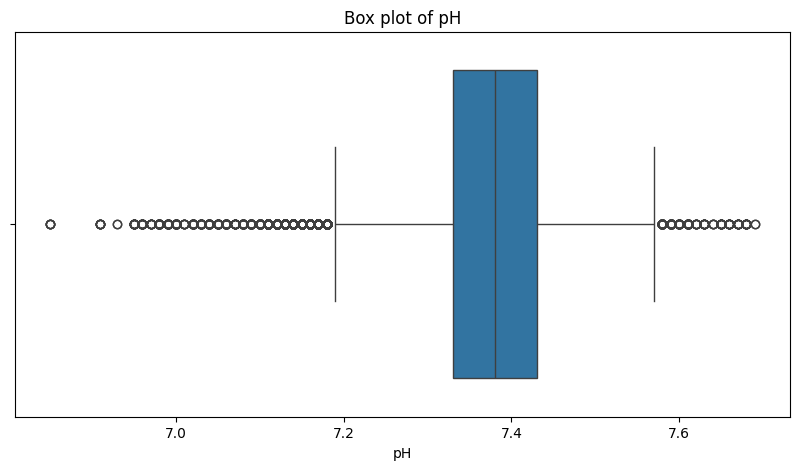

In [328]:
#Finding and plotting the outliers.

def identify_outliers(col):

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return col[(col < lower_bound) | (col > upper_bound)]

# Detecting outliers for each numerical column and plotting box plots to proof

for col in numerical_df:
    if col  not in ['target']:

        outliers = identify_outliers(numerical_df[col])
        print(f"Outliers in {col}:")
        print(outliers)

        # Plotting box plot
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=numerical_df[col])
        plt.title(f'Box plot of {col}')
        plt.show()


In [329]:
# Recalculate statistical description for numerical variables
numerical_description = numerical_df.describe()
numerical_description

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000,154652.000000
mean,60.593494,27.825582,144.437598,88.069705,78.772200,97.462247,18.542859,119.048354,36.866767,78.040459,7.377704,0.159972
std,14.371465,24.534864,58.258110,18.616646,16.741849,3.903668,6.562998,23.304319,1.028054,24.121831,0.078379,0.366581
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.850000,0.000000
25%,51.000000,9.000000,109.000000,75.000000,68.000000,96.000000,14.000000,103.000000,36.299999,60.593494,7.330000,0.000000
50%,59.000000,15.000000,132.000000,87.000000,77.000000,98.000000,18.000000,116.000000,36.888901,71.900002,7.380000,0.000000
75%,69.000000,60.593494,164.000000,99.000000,88.000000,100.000000,22.000000,133.000000,37.444445,90.000000,7.430000,0.000000
max,194.000000,60.593494,1268.000000,222.000000,300.000000,100.000000,99.000000,295.000000,42.222222,290.298880,7.690000,1.000000


In [332]:
# Removing Outliers
def remove_outliers(numerical_df, col):

    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    return numerical_df[(numerical_df[col] >= lower_bound) & (numerical_df[col] <= upper_bound)]


for col in numerical_df:
    if col not in ['target']: # remove columns with binary types
        numerical_df = remove_outliers(numerical_df, col)
        print(f'Removed outliers for columns {col} successfully')


Removed outliers for columns Diastolic blood pressure successfully
Removed outliers for columns Glascow coma scale total successfully
Removed outliers for columns Glucose successfully
Removed outliers for columns Heart Rate successfully
Removed outliers for columns Mean blood pressure successfully
Removed outliers for columns Oxygen saturation successfully
Removed outliers for columns Respiratory rate successfully
Removed outliers for columns Systolic blood pressure successfully
Removed outliers for columns Temperature successfully
Removed outliers for columns Weight successfully
Removed outliers for columns pH successfully


In [333]:
# Verify missing values
print("\nMissing Values:")
print(numerical_df.isnull().sum())


Missing Values:
Diastolic blood pressure    0
Glascow coma scale total    0
Glucose                     0
Heart Rate                  0
Mean blood pressure         0
Oxygen saturation           0
Respiratory rate            0
Systolic blood pressure     0
Temperature                 0
Weight                      0
pH                          0
target                      0
dtype: int64


In [334]:
# Verify outliers
for col in numerical_df:
    if col not in ['target']:
        outliers = identify_outliers(numerical_df[col])
        if outliers.any():
            print(f"\nOutliers in {col}:")
            print(outliers)
        else:
            print(f"\nNo outliers found in {col}")


Outliers in Diastolic blood pressure:
50        95.0
156       93.0
157       94.0
467       95.0
468       94.0
          ... 
299180    93.0
299181    93.0
300692    94.0
300693    94.0
300822    93.0
Name: Diastolic blood pressure, Length: 1009, dtype: float64

No outliers found in Glascow coma scale total

Outliers in Glucose:
831       235.0
1489       32.0
1490       32.0
1491       32.0
1492       32.0
          ...  
300570    236.0
300571    236.0
300645    242.0
300646    242.0
300647    242.0
Name: Glucose, Length: 2278, dtype: float64

Outliers in Heart Rate:
391       133.0
432       133.0
433       133.0
434       133.0
1057      135.0
          ...  
300108     40.0
300109     41.0
300111     39.0
300240    135.0
300242    132.0
Name: Heart Rate, Length: 936, dtype: float64

Outliers in Mean blood pressure:
172       114.0
1309      115.0
1310      115.0
3222      114.0
3223      114.0
          ...  
299113    115.0
299114    115.0
299586    114.0
300161     40.0
30016

In [335]:
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000
mean,59.406330,27.099738,134.464039,86.647320,77.364255,97.896060,18.029068,117.481274,36.895318,75.873773,7.384874,0.142654
std,12.214316,24.292519,37.421617,16.919226,13.415526,2.352055,5.638585,20.675012,0.807258,18.875352,0.065890,0.349721
min,24.000000,3.000000,27.000000,39.000000,39.666698,90.000000,2.000000,57.000000,34.599999,20.774514,7.210000,0.000000
25%,51.000000,9.000000,108.000000,75.000000,68.000000,96.000000,14.000000,102.000000,36.333333,60.593494,7.340000,0.000000
50%,58.000000,15.000000,129.000000,86.000000,76.000000,99.000000,18.000000,116.000000,36.888901,71.000000,7.390000,0.000000
75%,67.000000,60.593494,156.000000,97.000000,86.000000,100.000000,22.000000,131.000000,37.444445,88.813314,7.430000,0.000000
max,96.000000,60.593494,246.000000,135.000000,115.333000,100.000000,34.000000,177.000000,39.111112,134.036436,7.560000,1.000000


In [336]:
# Removing Outliers
def remove_outliers(numerical_df, col):

    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    return numerical_df[(numerical_df[col] >= lower_bound) & (numerical_df[col] <= upper_bound)]


for col in numerical_df:
    if col not in ['target']: # remove columns with binary types
        numerical_df = remove_outliers(numerical_df, col)
        print(f'Removed outliers for columns {col} successfully')

Removed outliers for columns Diastolic blood pressure successfully
Removed outliers for columns Glascow coma scale total successfully
Removed outliers for columns Glucose successfully
Removed outliers for columns Heart Rate successfully
Removed outliers for columns Mean blood pressure successfully
Removed outliers for columns Oxygen saturation successfully
Removed outliers for columns Respiratory rate successfully
Removed outliers for columns Systolic blood pressure successfully
Removed outliers for columns Temperature successfully
Removed outliers for columns Weight successfully
Removed outliers for columns pH successfully


In [337]:
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,112771.000000,112771.000000,112771.000000,112771.000000,112771.000000,112771.000000,112771.000000,112771.000000,112771.000000,112771.000000,112771.000000,112771.000000
mean,59.078043,26.793024,132.592608,85.914721,77.098249,98.142279,17.734905,117.126096,36.895322,75.669968,7.385261,0.135806
std,11.738919,24.238957,34.946419,16.341907,13.038092,2.025203,5.186414,20.266591,0.803632,18.572350,0.065258,0.342584
min,27.000000,3.000000,36.000000,42.000000,41.000000,93.000000,4.000000,59.000000,34.666667,20.774514,7.210000,0.000000
25%,51.000000,9.000000,107.000000,74.000000,68.000000,97.000000,14.000000,102.000000,36.333333,60.593494,7.340000,0.000000
50%,58.000000,15.000000,128.000000,85.000000,76.000000,99.000000,17.000000,115.000000,36.888901,71.000000,7.390000,0.000000
75%,67.000000,60.593494,154.000000,97.000000,86.000000,100.000000,21.000000,131.000000,37.444445,88.599998,7.430000,0.000000
max,91.000000,60.593494,228.000000,130.000000,113.000000,100.000000,31.000000,174.000000,39.111112,131.100006,7.560000,1.000000


In [338]:
# Verify outliers
for col in numerical_df:
    if col not in ['target']:
        outliers = identify_outliers(numerical_df[col])
        if outliers.any():
            print(f"\nOutliers in {col}:")
            print(outliers)
        else:
            print(f"\nNo outliers found in {col}")


No outliers found in Diastolic blood pressure

No outliers found in Glascow coma scale total

Outliers in Glucose:
2386      225.0
2387      225.0
2388      225.0
2389      225.0
2390      225.0
          ...  
293700    228.0
294356    228.0
296826    225.0
296831    225.0
298999    226.0
Name: Glucose, Length: 557, dtype: float64

No outliers found in Heart Rate

No outliers found in Mean blood pressure

No outliers found in Oxygen saturation

No outliers found in Respiratory rate

No outliers found in Systolic blood pressure

No outliers found in Temperature

Outliers in Weight:
33507     131.0
33509     131.0
33510     131.0
33511     131.0
33513     131.0
          ...  
165843    131.0
165847    131.0
165848    131.0
165849    131.0
220404    131.0
Name: Weight, Length: 137, dtype: float64

No outliers found in pH


In [339]:
# Removing Outliers
def remove_outliers(numerical_df, col):

    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    return numerical_df[(numerical_df[col] >= lower_bound) & (numerical_df[col] <= upper_bound)]


for col in numerical_df:
    if col not in ['target']: # remove columns with binary types
        numerical_df = remove_outliers(numerical_df, col)
        print(f'Removed outliers for columns {col} successfully')

Removed outliers for columns Diastolic blood pressure successfully
Removed outliers for columns Glascow coma scale total successfully
Removed outliers for columns Glucose successfully
Removed outliers for columns Heart Rate successfully
Removed outliers for columns Mean blood pressure successfully
Removed outliers for columns Oxygen saturation successfully
Removed outliers for columns Respiratory rate successfully
Removed outliers for columns Systolic blood pressure successfully
Removed outliers for columns Temperature successfully
Removed outliers for columns Weight successfully
Removed outliers for columns pH successfully


In [340]:
# Verify outliers
for col in numerical_df:
    if col not in ['target']:
        outliers = identify_outliers(numerical_df[col])
        if outliers.any():
            print(f"\nOutliers in {col}:")
            print(outliers)
        else:
            print(f"\nNo outliers found in {col}")


No outliers found in Diastolic blood pressure

No outliers found in Glascow coma scale total

No outliers found in Glucose

No outliers found in Heart Rate

No outliers found in Mean blood pressure

No outliers found in Oxygen saturation

No outliers found in Respiratory rate

No outliers found in Systolic blood pressure

No outliers found in Temperature

Outliers in Weight:
113392    130.5
113395    130.5
113397    130.5
113398    130.5
113399    130.5
113400    130.5
113401    130.5
113402    130.5
113405    130.5
113406    130.5
113408    130.5
113409    130.5
113415    130.5
Name: Weight, dtype: float64

No outliers found in pH


In [341]:
# Removing Outliers
def remove_outliers(numerical_df, col):

    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    return numerical_df[(numerical_df[col] >= lower_bound) & (numerical_df[col] <= upper_bound)]


for col in numerical_df:
    if col not in ['target']: # remove columns with binary types
        numerical_df = remove_outliers(numerical_df, col)
        print(f'Removed outliers for columns {col} successfully')

Removed outliers for columns Diastolic blood pressure successfully
Removed outliers for columns Glascow coma scale total successfully
Removed outliers for columns Glucose successfully
Removed outliers for columns Heart Rate successfully
Removed outliers for columns Mean blood pressure successfully
Removed outliers for columns Oxygen saturation successfully
Removed outliers for columns Respiratory rate successfully
Removed outliers for columns Systolic blood pressure successfully
Removed outliers for columns Temperature successfully
Removed outliers for columns Weight successfully
Removed outliers for columns pH successfully


In [342]:
# Verify outliers
for col in numerical_df:
    if col not in ['target']:
        outliers = identify_outliers(numerical_df[col])
        if outliers.any():
            print(f"\nOutliers in {col}:")
            print(outliers)
        else:
            print(f"\nNo outliers found in {col}")


No outliers found in Diastolic blood pressure

No outliers found in Glascow coma scale total

No outliers found in Glucose

No outliers found in Heart Rate

No outliers found in Mean blood pressure

No outliers found in Oxygen saturation

No outliers found in Respiratory rate

No outliers found in Systolic blood pressure

No outliers found in Temperature

No outliers found in Weight

No outliers found in pH


In [343]:
numerical_df.describe()

,Diastolic blood pressure,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,111914.000000,111914.000000,111914.000000,111914.000000,111914.000000,111914.000000,111914.000000,111914.000000,111914.000000,111914.000000,111914.000000,111914.000000
mean,59.078516,26.821355,132.127205,85.837804,77.100491,98.145299,17.729533,117.136408,36.894598,75.596067,7.385313,0.135577
std,11.729391,24.242938,34.403945,16.271551,13.031771,2.023466,5.183661,20.266586,0.803183,18.467821,0.065261,0.342341
min,27.000000,3.000000,37.000000,42.000000,41.000000,93.000000,4.000000,59.000000,34.666667,20.774514,7.210000,0.000000
25%,51.000000,9.000000,107.000000,74.000000,68.000000,97.000000,14.000000,102.000000,36.333333,60.593494,7.340000,0.000000
50%,58.000000,15.000000,128.000000,85.000000,76.000000,99.000000,17.000000,115.000000,36.888901,71.000000,7.390000,0.000000
75%,67.000000,60.593494,154.000000,96.000000,86.000000,100.000000,21.000000,131.000000,37.444445,88.500000,7.430000,0.000000
max,91.000000,60.593494,224.000000,129.000000,113.000000,100.000000,31.000000,174.000000,39.111112,130.300003,7.560000,1.000000


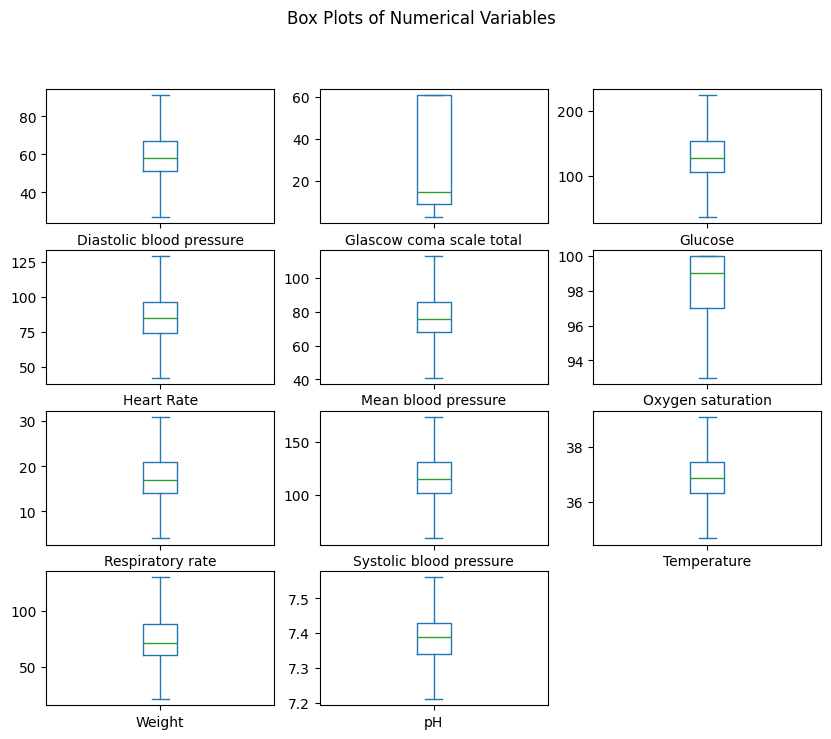

In [347]:
# Plotting to show no outliers present.
numerical_df[['Diastolic blood pressure',	'Glascow coma scale total',	'Glucose',	'Heart Rate',
    'Mean blood pressure',	'Oxygen saturation',	'Respiratory rate',
    'Systolic blood pressure',	'Temperature',	'Weight',	'pH'	]].plot(
        kind='box', subplots=True, layout=(4,3), figsize=(10, 8), title='Box Plots of Numerical Variables')
plt.show()

# Analysis of Advantages and Disadvantages

## Advantages of the Data Preprocessing Process:

Improved Data Quality:
> By removing outliers and missing values, the data becomes more consistent and reliable, which can lead to more accurate analysis and model building.

Enhanced Model Performance:
> Machine learning models often perform better with cleaner data. Outliers can skew results, while missing values can cause errors or biases. Preprocessing helps to mitigate these issues.

Meaningful Insights:
> Clean data allows for more meaningful insights and interpretations from your analysis, reducing the risk of drawing incorrect conclusions due to data anomalies.



# Disadvantages of the Data Preprocessing Process:

Potential Information Loss:
> Removing outliers or records with missing values might result in losing valuable information. Careful consideration is needed to ensure that the benefits of cleaning outweigh the potential loss.

Introduction of Bias:
> Replacing missing values with central tendency measures (like mean or median) can introduce bias into the data, especially if the missing data is not missing completely at random.

Sensitivity to Methods:
> The effectiveness of outlier detection and handling methods can vary depending on the data distribution and the chosen techniques. It's crucial to select appropriate methods and evaluate their impact.